# Keras Sequential API
Keras의 Sequential API는 Keras 패키지에 구현된 여러 레이어들을 배열에 넣어 손쉽게 모델링 해주는 API 입니다.

가장 쉽고, 가장 기본적인 모델을 만들 때 사용합니다. Sequential API를 사용해서 만들 수 있으면 가장 추천하는 방법입니다.

In [1]:
from tensorflow import keras

In [2]:
f_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = f_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 시각화

In [3]:
image = X_test[0]
image.shape

(28, 28)

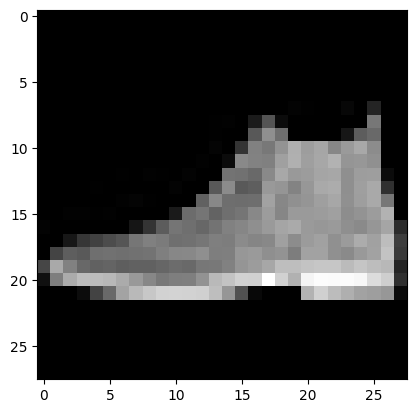

In [4]:
import matplotlib.pyplot as plt

plt.imshow(image, 'gray')
plt.show()

# Keras 기반의 FCL 구현

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # 평탄화
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # 은닉층(FCL 구현. TF에서는 Dense, PyTorch에서는 Linear)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    # 출력층
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 컴파일
모델 컴파일 과정의 목적은 모델이 어떤 식으로 최적화를 수행할 것인지, 어떤 손실 함수를 사용할 것인지, 모델의 평가 방식을 지정합니다.
- `optimizer` : 모델의 최적화 방식 설정
- `loss` : 모델의 손실함수 결정
- `metrics` : 평가방식 결정
  - 거의 대부분의 분류문제에서 `'accuracy', 'acc'` 를 사용합니다.

In [6]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
# optimizer : 최적화 방식. 경사하강법
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# 모델 훈련

In [8]:
# 데이터 세트
BATCH_SIZE = 64

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=100000).batch(BATCH_SIZE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [10]:
# next(iter(train_ds))

In [11]:
model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6531 - loss: 5.3719 - val_accuracy: 0.7878 - val_loss: 0.6868
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8029 - loss: 0.6035 - val_accuracy: 0.8092 - val_loss: 0.5914
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8351 - loss: 0.4824 - val_accuracy: 0.8267 - val_loss: 0.4869
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8477 - loss: 0.4287 - val_accuracy: 0.8360 - val_loss: 0.4621
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8547 - loss: 0.4054 - val_accuracy: 0.8388 - val_loss: 0.4571
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8587 - loss: 0.3877 - val_accuracy: 0.8441 - val_loss: 0.4449
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8627 - loss: 0.3848 - val_accuracy: 0.8547 - val_loss: 0.3956
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8704 - loss: 0.3591 - val_accuracy: 0

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_split=0.2 # 훈련 데이터의 20퍼센트를 검증용으로 쓰겠다.
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8789 - loss: 0.3320 - val_accuracy: 0.8630 - val_loss: 0.3741
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8869 - loss: 0.3129 - val_accuracy: 0.8716 - val_loss: 0.3568
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8861 - loss: 0.3120 - val_accuracy: 0.8858 - val_loss: 0.3208
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8901 - loss: 0.3016 - val_accuracy: 0.8788 - val_loss: 0.3419
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8938 - loss: 0.2874 - val_accuracy: 0.8804 - val_loss: 0.3325
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8932 - loss: 0.2902 - val_accuracy: 0.8688 - val_loss: 0.3687
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8960 - loss: 0.2859 - val_accuracy: 0.8797 - val_loss: 0.3616
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8968 - loss: 0.2805 - val_accuracy: 0.